# Gradient Descent

**Try and find a local minimum** in the function $\text{cos}(3\pi x)/x$ in the range $(0.1, 3)$, in other words, to obtain local convergence.

https://harvard-iacs.github.io/2020-CS109A/lectures/lecture30/notebook/

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(22) 

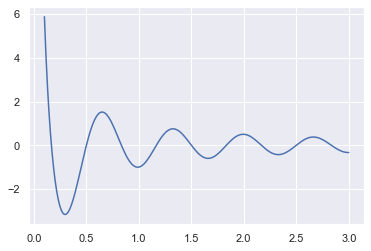

In [5]:
def f(x):
    return np.cos(3*np.pi*x)/x

def der_f(x):
    '''derivative of f(x)'''
    return -(3*np.pi*x*np.sin(3*np.pi*x)+np.cos(3*np.pi*x))/x**2

x = np.linspace(0.1,3,200)
plt.plot(x, f(x));

In [6]:
# functions to visualize the gradient descent

def get_tangent_line(x, x_range = 0.5):
    # returns few points on tangent line of f(x)
    # x, y, and slope are returned
    
    y = f(x)
    m = der_f(x)
    
    # Eqn of line for tangent at (x1, y1)
    # y = m(x - x1) + y1
    
    x1, y1 = x, y   # point at which tangent is reqd
    x = np.linspace(x1 - x_range/2, x1 + x_range/2, 50)  # initialize x values to left and right of x1
    y = m * (x - x1) + y1
    
    return x, y, m


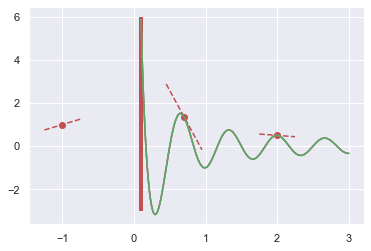

In [15]:
# function to plot the point and tangent
# If cur_x is out of range, a vertical line at the boundary is plotted

def plot_it(cur_x, title = ''):
    x_tan, y_tan, der = get_tangent_line(cur_x) # get the tangent line 
    
    y = f(x)
    plt.plot(x, f(x))
    plt.plot(cur_x, f(cur_x), 'o', color = 'r') # point on curve
    plt.plot(x_tan, y_tan, '--', color = 'r')
    plt.title(title)
    
    # indicate if cur_x is out of range
    if cur_x > x.max():
        plt.vlines(x.max(), ymin = -3, ymax = 6, color = 'r', lw = 4)
    if cur_x < x.min():
        plt.vlines(x.min(), ymin = -3, ymax = 6, color = 'r', lw = 4)
    
plot_it(2)
plot_it(.7)
plot_it(-1)

In [16]:
# Function that takes in various parameters

def find_min(max_iter = 50, 
             cur_x = 0.5,          # inital value of x
             learning_rate = 0.01, # how large the steps are
             epsilon = 0.0025      # check for convergence based on change in the x
            ):
    
    converged = False
    
    plt.figure(figsize = (15,20))
    for i in range(max_iter):

        plt.subplot(max_iter//5 + 1, 5, i+1)
        plot_it(cur_x, title = f" step {i+1}")

        prev_x = cur_x  # previous x
        delta = der_f(cur_x) # derivative
        cur_x = cur_x - learning_rate * delta  # update x

        # check convergence if the difference in udpates of x is less than epsilon
        if (np.abs(cur_x - prev_x) < epsilon):
            converged = True

        if converged == True:
            print('Converged to local minimum!')
            break

    if not converged:
        print('Did not converge')

    plt.tight_layout()

Converged to local minimum!


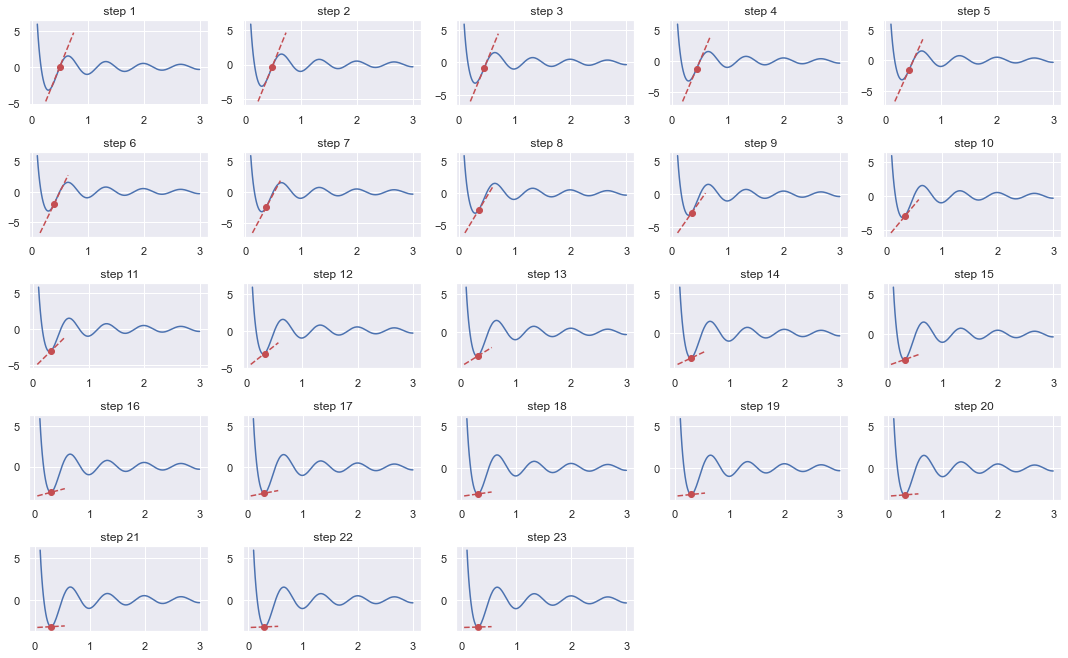

In [17]:
# Covnerges to global min by setting appropriate value of cur_x, learning rate, and epsilon

find_min(max_iter = 50, 
             cur_x = 0.5,          # inital value of x
             learning_rate = 0.001, # how large the steps are
             epsilon = 0.00025      # check for convergence based on change in the x
            )

Converged to local minimum!


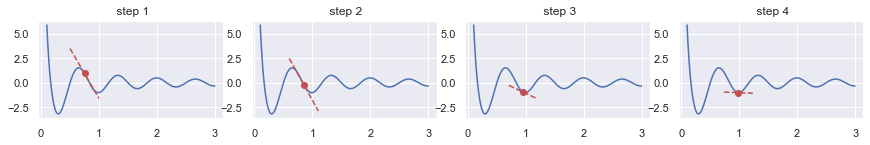

In [135]:
# Finds local minimum

find_min(max_iter = 50, 
             cur_x = 0.75,          # inital value of x
             learning_rate = 0.01, # how large the steps are
             epsilon = 0.0025      # check for convergence based on change in the x
            )

Did not converge


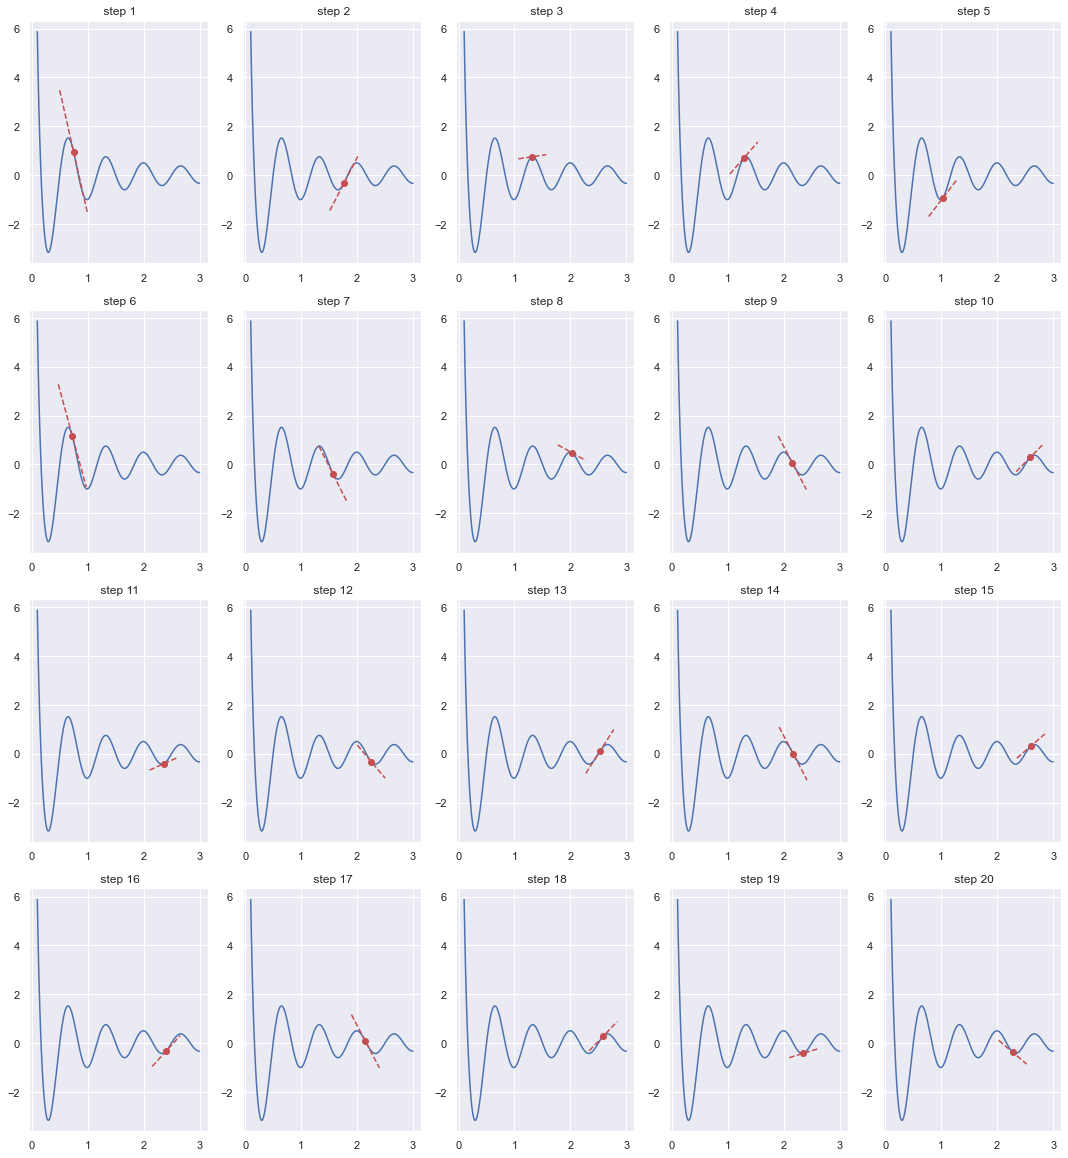

In [143]:
# Learning rate is quite high, so keeps jumping left and right

find_min(max_iter = 20, 
             cur_x = 0.75,          # inital value of x
             learning_rate = 0.1,  # how large the steps are
             epsilon = 0.0025      # check for convergence based on change in the x
            )